<img src='./img/egu21_logo.png' alt='Logo EU Copernicus EUMETSAT' align='left' width='25%'></img><img src='./img/atmos_logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='65%'></img></span>

<br>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./13_CAMS_European_air_quality_forecast_dust_concentration_exercise_solution.ipynb"><< 13 - CAMS European Air Quality Forecast - Dust - Exercise Solution</a><span style="float:right;"><a href="./15_Metop-ABC_GOME-2_AAI_L3_exercise_solution.ipynb">15 - Metop-ABC GOME-2 AAI Level 3 - Exercise Solution>></a></span>

<div class="alert alert-block alert-info">
<b>EXERCISE WORKBOOK</b>
</div>

<hr>

# Sentinel-5P TROPOMI - Ultraviolet Aerosol Index (AI) - Level 2

This notebook is an `exercise workbook` which allows you to practise the preparation of Sentinel-5P TROPOMI Aerosol Index Level-2 data to analyse a dust event at the beginning of February 2021.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code.
You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<br>

#### Outline:
* [1 - Load and browse 'Sentinel-5P TROPOMI Aerosol Index Level 2' data](#load_browse_s5p)
* [2 - Retrieve the variable 'Aerosol index from 354 and 388 nm' as xarray.DataArray](#data_retrieve_s5p)
* [3 - Visualize 'Sentinel-5P TROPOMI aerosol index from 388 and 354 nm'](#visualize_s5p)
* [4 - Create a geographical subset for Europe](#subset_s5p)

<hr>

##### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

##### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

### <a id='load_browse_s5p'></a>Load and browse `Sentinel-5P TROPOMI Aerosol Index Level 2` data

A Sentinel-5P TROPOMI Aerosol Index Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load a `netCDF` file with the `open_dataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group

Let us load a Sentinel-5P TROPOMI data file as `xarray.Dataset` from 06 February 2021:

In [3]:
file = xr.open_dataset('./eodata/sentinel5p/ai/2021/02/06/S5P_OFFL_L2__AER_AI_20210206T120713_20210206T134843_17197_01_010400_20210208T015719.nc', group='PRODUCT')
file



<xarray.Dataset>
Dimensions:                          (corner: 4, ground_pixel: 450, scanline: 4172, time: 1)
Coordinates:
  * scanline                         (scanline) float64 0.0 1.0 ... 4.171e+03
  * ground_pixel                     (ground_pixel) float64 0.0 1.0 ... 449.0
  * time                             (time) datetime64[ns] 2021-02-06
  * corner                           (corner) float64 0.0 1.0 2.0 3.0
    latitude                         (time, scanline, ground_pixel) float32 ...
    longitude                        (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                       (time, scanline) datetime64[ns] ...
    time_utc                         (time, scanline) object ...
    qa_value                         (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 ...

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
   Look at the loaded xarray.Dataset and identify the dimensions. What data variables are available in the data file?
</div>

You see that the loaded data object contains of four dimensions and seven data variables:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `qa_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `aerosol_index_354_388`: Aerosol index from 354 and 388 nm
  * `aerosol_index_340_380`: Aerosol index from 340 and 380 nm
  * `aerosol_index_354_388_precision`: Precision of aerosol index from 354 and 388 nm
  * `aerosol_index_340_380_precision`: Precision of aerosol index from 340 and 380 nm

<br>

### <a id='data_retrieve_s5p'></a>Retrieve the variable `Aerosol index from 354 and 388 nm` as xarray.DataArray

As a next step, you want to load one specific data variable from the `xarray.Dataset` above.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which selects the data variable <b>aerosol_index_354_388</b> from the xarray.Dataset <i>file</i> and call it <b>ai</b>. 
</div>

In [ ]:
# Enter your solution here







In [4]:
ai = file['aerosol_index_354_388']
ai

<xarray.DataArray 'aerosol_index_354_388' (time: 1, scanline: 4172, ground_pixel: 450)>
[1877400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2021-02-06
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
Can you identify the `long_name` of the selected data variable and do you know where it is stored?
</div>

**Response**:

The long name of a data variable is stored as `long_name` attribute. The `long_name` of **aerosol_index_354_388** is `Aerosol index from 388 and 354 nm`.


<br>

You see that the `xarray.DataArray` has three dimensions, with the dimension time only having one entry. Let us select the single time step, in order to have the two-dimensional data array.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which selects the one time step from the xarray.DataArray `ai` and call it <b>ai_0602</b> 
</div>

In [ ]:
# Enter your solution here










In [5]:
ai_0602 = ai[0,:,:]
ai_0602

<xarray.DataArray 'aerosol_index_354_388' (scanline: 4172, ground_pixel: 450)>
[1877400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2021-02-06
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

<br>

Additionally, you can save the attributes `units` and `longname`, which you can make use of when visualizing the data.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which selects the following attributes: 
* `long_name` and 
* `units`.
    
Call the variables `longname` and `units` respectively.
</div>

In [ ]:
# Enter your solution here









In [6]:
longname = ai_0602.long_name
units = ai_0602.units

longname, units

('Aerosol index from 388 and 354 nm', '1')

<br>

### <a id='visualize_s5p'></a>Visualize `Sentinel-5P TROPOMI aerosol index from 388 and 354 nm`

The next step is to visualize the dataset.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) in order to visualize the xarray.DataArray <code>ai_0602</code>. <br>
    
The following kwargs have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color_sale`
* `unit`
* `longname`
* `vmin`,
* `vmax`,
* `lonmin`, `lonmax`, `latmin`, `latmax`
* `set_global`
    
Note: with `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot.

</div>

In [ ]:
# Enter your solution here











(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol index from 388 and 354 nm 2021-02-06T00:00:00.000000000'}>)

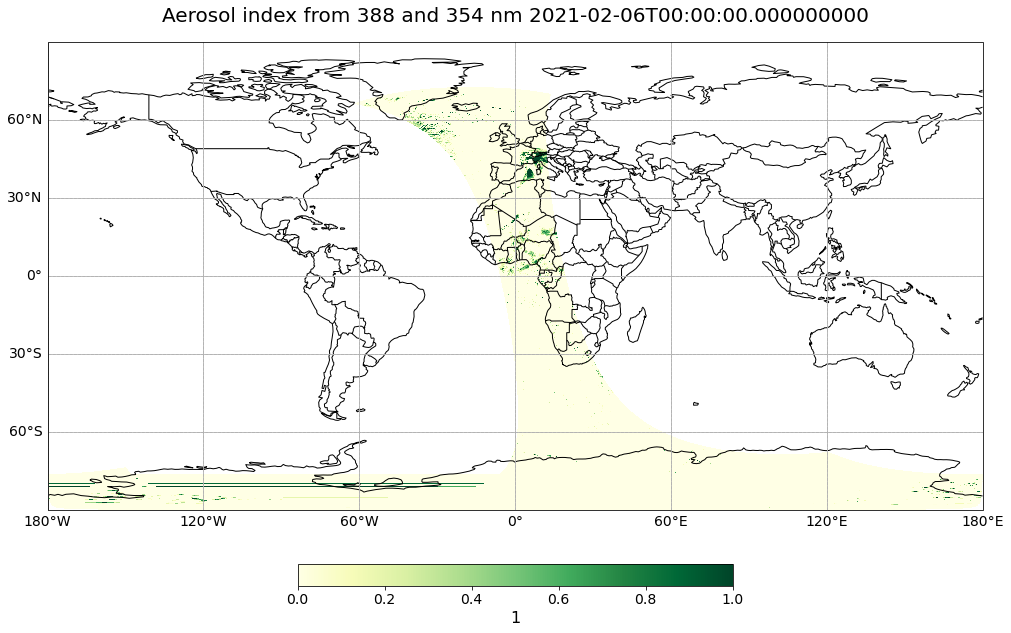

In [7]:
visualize_pcolormesh(data_array=ai_0602,
                     longitude=ai_0602.longitude,
                     latitude=ai_0602.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0602.time.data),
                     vmin=0, 
                     vmax=1,
                     lonmin=-180,
                     lonmax=180,
                     latmin=-90,
                     latmax=90,
                     set_global=True)

<br>

### <a id='subset_s5p'></a>Create a geographical subset for Europe

The map above shows the aerosol index of one footprint along the entire latitude range. Let us create a geographical subset for Europe, in order to better analyse the Saharan dust event over Europe.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Create a geographical subset for Europe. Make use of the function <a href='../functions.ipynb#generate_geographical_subset'>generate_geographical_subset</a> and call the new DataArray <code>ai_0602_subset</code>.<br>

The bounding box information can be the following:<br>
- **latmin=28.**
- **latmax=71.**
- **lonmin=-22.**
- **lonmax=43**

<b>HINT:</b><br> With `?generate_geographical_subset`, you can see what keyword arguments the function requires.

</div>

In [ ]:
# Enter your solution here







In [9]:
latmin=28
latmax=71
lonmin=-22
lonmax=43

ai_0602_subset = generate_geographical_subset(xarray=ai_0602, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
ai_0602_subset

<xarray.DataArray 'aerosol_index_354_388' (scanline: 911, ground_pixel: 450)>
array([[        nan,         nan,         nan, ..., -0.18838878,
        -0.550947  , -0.5468501 ],
       [        nan,         nan,         nan, ..., -0.20505159,
        -0.361677  , -0.2746366 ],
       [        nan,         nan,         nan, ..., -0.30932063,
        -0.32334223, -0.20750041],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 2.903e+03 2.904e+03 ... 3.812e+03 3.813e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2021-02-06
    latitude      (scanline, ground_pixel) float32 22.488323 ... 71.63247
    longitude     (scanline, ground_pixel) float32 -11.969172 ... 14.169963
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

How many entries for `scanline` does the DataArray **ai_0602_subset** have compared to the DataArray **ai_0602**?
</div>

**Response**

The scanline entries have reduced from formerly `4172` to now `911` values.

<br>

Let us now visualize the subsetted `xarray.DataArray` over Europe.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) in order to visualize the subsetted DataArray <code>ai_0602_subset</code>. <br>
    
Make sure to set the `set_global` kwarg to `False` and specify the latitude and longitude bounding box to the ones specified for Europe.

Try also to add the time information as part of the title. Add the string of the datetime information to the `longname` variable: `longname + ' ' + str(ai_0602_subset.time.data)`.

In [ ]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol index from 388 and 354 nm 2021-02-06T00:00:00.000000000'}>)

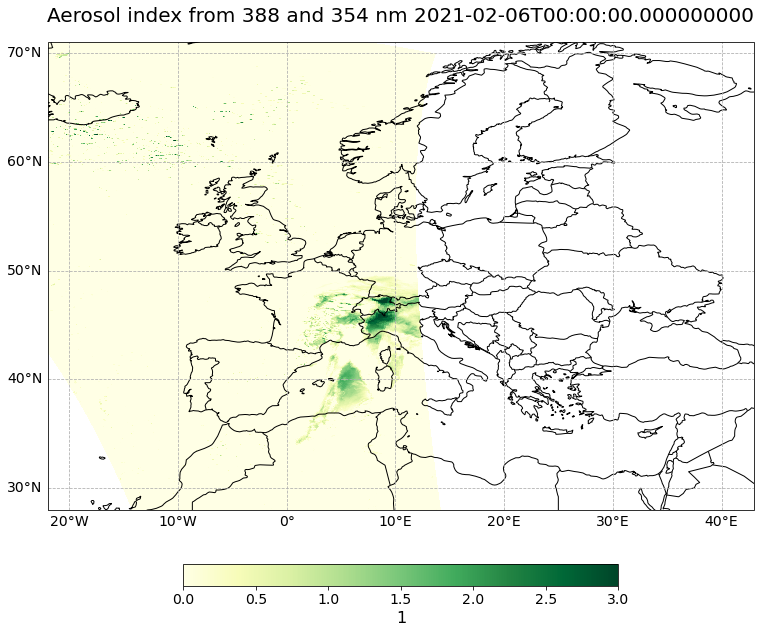

In [10]:
visualize_pcolormesh(data_array=ai_0602_subset,
                     longitude=ai_0602_subset.longitude,
                     latitude=ai_0602_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0602_subset.time.data),
                     vmin=0, 
                     vmax=3,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./13_CAMS_European_air_quality_forecast_dust_concentration_exercise_solution.ipynb"><< 13 - CAMS European Air Quality Forecast - Dust - Exercise Solution</a><span style="float:right;"><a href="./15_Metop-ABC_GOME-2_AAI_L3_exercise_solution.ipynb">15 - Metop-ABC GOME-2 AAI Level 3 - Exercise Solution>></a></span>

<hr>

<img src='../../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.